# One-Sample T-Tests in SciPy

## Introduction

In this lesson, we will walk through the implementation of a one-sample t-test in Python. One-sample t-tests are used for comparing a sample average to a hypothetical population average. For example, a one-sample t-test might be used to address questions such as:

* Is the average amount of time that visitors spend on a website different from 5 minutes?
* Is the average amount of money that customers spend on a purchase more than 10 USD?

As an example, let us imagine the fictional business BuyPie, which sends ingredients for pies to your household so that you can make them from scratch. Suppose that a product manager wants online BuyPie orders to cost around 1000 Rupees on average. In the past day, 50 people made an online purchase and the average payment per order was less than 1000 Rupees. Are people really spending less than 1000 Rupees on average? Or is this the result of chance and a small sample size?

***
### Exercise

In [1]:
import numpy as np

prices = np.genfromtxt("prices.csv")

1. We have provided a small dataset called `prices`, representing the purchase prices of customers to BuyPie.com in the past day.

    First, print out `prices` and examine the numbers. How much variation is there in the purchase prices? Can you estimate the mean by looking at these numbers?

In [2]:
prices

array([ 978., 1080.,  999.,  855., 1105.,  961.,  899., 1061.,  880.,
       1455.,  505.,  936., 1024.,  982.,  840.,  930.,  829.,  504.,
        955., 1380., 1361., 1130.,  946.,  973., 1076., 1131.,  810.,
        734., 1275.,  867.,  962.,  865.,  709., 1216.,  735.,  768.,
        757., 1060.,  715.,  839.,  999., 1259., 1194., 1082., 1129.,
       1255.,  931., 1236.,  921.,  907.])

2. Calculate the mean of prices using `np.mean()`. Store it in a variable called `prices_mean` and print it out.

    What is the average purchase price for these 50 purchases? Is it a lot less than 1000? Or only a little less?

In [3]:
prices_mean = np.mean(prices)
prices_mean

980.0

***

## Implementing a One-Sample T-Test

In the last exercise, we inspected a sample of 50 purchase prices at BuyPie and saw that the average was 980 Rupees. Suppose that we want to run a one-sample t-test with the following null and alternative hypotheses:

* Null: The average cost of a BuyPie order is 1000 Rupees
* Alternative: The average cost of a BuyPie order is **not** 1000 Rupees.

SciPy has a function called `ttest_1samp()`, which performs a one-sample t-test for you. `ttest_1samp()` requires two inputs, a sample distribution (eg. the list of the 50 observed purchase prices) and a mean to test against (eg. `1000`):

```
tstat, pval = ttest_1samp(sample_distribution, expected_mean)
```

The function uses your sample distribution to determine the sample size and estimate the amount of variation in the population — which are used to estimate the null distribution. It returns two outputs: the t-statistic (which we will cover in this course), and the p-value.

***
### Exercise

In [4]:
from scipy.stats import ttest_1samp

1. Use `ttest_1samp()` to run the hypothesis test described above (null: the average price is 1000 Rupees; alternative: the average price is **not** 1000 Rupees).

    Store the p-value in a variable called `pval`. Remember that it is the second output of the ttest_1samp() function. We will use the first output, the `t-statistic`, so you can store it in a variable with whatever name you would like.

In [5]:
expected_mean = 1000
_, pval = ttest_1samp(prices, expected_mean)

2. Print out `pval`.

    Does the p-value you got make sense, knowing the mean of prices and having inspected the data? (Look at the hint for an answer to this question).

*Hint: P-values are probabilities, so they should be between 0 and 1. This p-value is the probability of observing an average purchase price less than 980 OR more than 1020 among a sample of 50 purchases. If you run the test correctly, you should see a p-value of 0.49 or 49%.*

*Given that the mean purchase price in this sample was 980, which is not very far from 1000, we probably expect this p-value to be relatively large. The only reason it COULD be small (eg., <.05) is if purchase prices had very little variation (eg., they were all within a few Rupees of 980). We can see from the data print out that this is not the case. Therefore, a p-value around 0.49 makes sense!*

In [6]:
pval

0.4920744804182786

***

## Assumptions of a One Sample T-Test

When running any hypothesis test, it is important to know and verify the assumptions of the test. The assumptions of a one-sample t-test are as follows:

* The sample was randomly selected from the population
    * For example, if you only collect data for site visitors who agree to share their personal information, this subset of visitors was not randomly selected and may differ from the larger population.
* The individual observations were independent
    * For example, if one visitor to BuyPie loves the apple pie they bought so much that they convinced their friend to buy one too, those observations were not independent.
* The data is normally distributed without outliers OR the sample size is large (enough)
    * There are no set rules on what a "large enough" sample size is, but a common threshold is around 40. For sample sizes smaller than 40, and really all samples in general, it is a good idea to make sure to plot a histogram of your data and check for outliers, multi-modal distributions (with multiple humps), or skewed distributions. If you see any of those things for a small sample, a t-test is probably not appropriate.

In general, if you run an experiment that violates (or possibly violates) one of these assumptions, you can still run the test and report the results — but you should also report assumptions that were not met and acknowledge that the test results could be flawed.

***
### Exercise

In [7]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')

1. Using `plt.hist()`, plot a histogram of prices and check whether the values are (approximately) normally distributed. Do you see anything to make you concerned that the assumptions of the test were not met (skew, bi-modality, outliers)?

*Hint: There does not seem to be any clear skewness, bi-modality, or outliers. The histogram is approximately normal.*

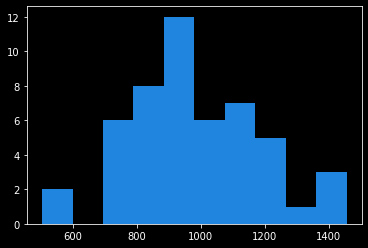

In [8]:
plt.hist(prices, color='#1F85DE')
plt.show()

***

## Review

Congratulations! You now know how to implement a one-sample t-test in Python and verify the assumptions of the test. To recap, here are some of the things you learned:

* One-sample t-tests are used for comparing a sample mean to an expected population mean
* A one-sample t-test can be implemented in Python using the SciPy `ttest_1samp()` function
* Assumptions of a one-sample t-test include:
    * The sample was randomly drawn from the population of interest
    * The observations in the sample are independent
    * The sample size is large "enough" or the sample data is normally distributed

***
### Exercise

In [9]:
daily_prices = np.genfromtxt("daily_prices.csv", delimiter=",")

As a final exercise, some data has been loaded for you with purchase prices for consecutive days at BuyPie. You can access the first day using `daily_prices[0]`, the second using `daily_prices[1]`, etc.. To practice running a one-sample t-test and inspecting the resulting p-value, try the following:

1. Calculate and print out a p-value for day 1 where the null hypothesis is that the average purchase price was 1000 Rupees and the alternative hypothesis is that the average purchase price was not 1000 Rupees.
2. Run the same hypothesis tests for days 1-10 and print out the resulting p-values. What is the smallest p-value you observe for those 10 days?
3. Try changing the null hypothesis so that the expected population mean that you are testing against is different from 1000. Try any numbers that you want. How do your p-values change?

#### 1. Day 1 p-value

In [10]:
expected_mean = 1000
_, pval = ttest_1samp(daily_prices[0], expected_mean)

pval

0.6071186852381733

#### 2. Smallest p-value for day 1-10

In [11]:
expected_mean = 1000

for i in range(0, 10):
    _, pval = ttest_1samp(daily_prices[i], expected_mean)
    print(f'Day {i} p-value {pval:.3f}')

Day 0 p-value 0.607
Day 1 p-value 0.409
Day 2 p-value 0.682
Day 3 p-value 0.940
Day 4 p-value 0.843
Day 5 p-value 0.019
Day 6 p-value 0.624
Day 7 p-value 0.859
Day 8 p-value 0.774
Day 9 p-value 0.681


#### 3. Different null hypothesis

In [12]:
print('+' + 40 * '-' + '+')
for expected_mean in range(900, 1150, 50):
    print('|' + f'Alternative null hypothesis mean = {expected_mean}' + (40 - len(f'Alternative null hypothesis mean = {expected_mean}')) * ' ' + '|')
    for i in range(0, 10):
        _, pval = ttest_1samp(daily_prices[i], expected_mean)
        print('|' + f'Day {i + 1} p-value {pval:.3f}' + (40 - len(f'Day {i + 1} p-value {pval:.3f}')) * ' ' + '|')
    print('+' + 40 * '-' + '+')

+----------------------------------------+
|Alternative null hypothesis mean = 900  |
|Day 1 p-value 0.000                     |
|Day 2 p-value 0.000                     |
|Day 3 p-value 0.000                     |
|Day 4 p-value 0.000                     |
|Day 5 p-value 0.000                     |
|Day 6 p-value 0.000                     |
|Day 7 p-value 0.000                     |
|Day 8 p-value 0.000                     |
|Day 9 p-value 0.000                     |
|Day 10 p-value 0.000                    |
+----------------------------------------+
|Alternative null hypothesis mean = 950  |
|Day 1 p-value 0.006                     |
|Day 2 p-value 0.002                     |
|Day 3 p-value 0.006                     |
|Day 4 p-value 0.023                     |
|Day 5 p-value 0.023                     |
|Day 6 p-value 0.000                     |
|Day 7 p-value 0.008                     |
|Day 8 p-value 0.054                     |
|Day 9 p-value 0.022                     |
|Day 10 p-v

***

# Simulating a Binomial Test

## Introduction

In this lesson, we will walk through a simulation of a binomial hypothesis test in Python. Binomial tests are useful for comparing the frequency of some outcome in a sample to the expected probability of that outcome. For example, if we expect 90% of ticketed passengers to show up for their flight but only 80 of 100 ticketed passengers actually show up, we could use a binomial test to understand whether 80 is significantly different from 90.

Binomial tests are similar to one-sample t-tests in that they test a sample statistic against some population-level expectation. The difference is that:

* binomial tests are used for binary categorical data to compare a sample frequency to an expected population-level probability
* one-sample t-tests are used for quantitative data to compare a sample mean to an expected population mean.

In Python, as in many other programming languages used for statistical computing, there are a number of libraries and functions that allow a data scientist to run a hypothesis test in a single line of code. However, a data scientist will be much more likely to spot and fix potential errors and interpret results correctly if they have a conceptual understanding of how these functions work. To that end, this lesson will help you build your own conceptual understanding!

***
### Exercise

In [13]:
import pandas as pd

pd.set_option('display.max_rows', None)
monthly_report = pd.read_csv('monthly_report.csv')

1. The next few exercises will walk through the process of using a binomial test to analyze data from a hypothetical online company, Live-it-LIVE.com — a website that sells all the necessary props and costumes to recreate iconic movie scenes at home!

    The data we will be working with has been loaded for you in the workspace and saved as an object named `monthly_report`. Print `monthly_report` so that you can inspect it.

    Note that the purchase column tells us whether a purchase was made; if so, the item that was purchased is listed in the item column. Feel free to scroll through the data so you can inspect more of the items!

In [14]:
print('Monthly Report DataFrame')

monthly_report

Monthly Report DataFrame


,timestamp,purchase,item
0,2020-01-17 17:23:06,y,cue cards - love actually
1,2020-01-25 17:09:39,n,NaN
2,2020-01-25 05:22:01,n,NaN
3,2020-01-18 04:33:40,y,t-rex - jurassic park
4,2020-01-24 17:24:52,n,NaN
5,2020-01-15 05:05:12,n,NaN
6,2020-01-01 03:51:44,n,NaN
7,2020-01-15 03:19:54,n,NaN
8,2020-01-01 18:17:08,n,NaN
9,2020-01-29 17:09:57,n,NaN


***

## Summarizing the Sample

The marketing department at Live-it-LIVE reports that, during this time of year, about 10% of visitors to Live-it-LIVE.com make a purchase.

The monthly report shows every visitor to the site and whether or not they made a purchase. The checkout page had a small bug this month, so the business department wants to know whether the purchase rate dipped below expectation. They have asked us to investigate this question.

In order to run a hypothesis test to address this, we will first need to know two things from the data:

* The number of people who visited the website
* The number of people who made a purchase on the website

Assuming each row of our dataset represents a unique site visitor, we can calculate the number of people who visited the website by finding the number of rows in the data frame. We can then find the number who made a purchase by using a conditional statement to add up the total number of rows where a purchase was made.

For example, suppose that the dataset `candy` contains a column named `chocolate` with `'yes'` recorded for every candy that has chocolate in it and `'no'` otherwise. The following code calculates the sample size (the number of candies) and the number of those candies that contain chocolate:

```
## sample size (number of rows): 
samp_size = len(candy)
 
## number with chocolate: 
total_with_chocolate = np.sum(candy.chocolate == 'yes')
```

***
### Exercise

1. Each row of the dataset `monthly_report` represents a single visitor to Live-it-LIVE.com during the week in question. Use .`head()` to print the first five rows of the data once again and inspect the `'purchase'` column. What are the values and how can you tell whether someone made a purchase?

In [15]:
monthly_report.head()

,timestamp,purchase,item
0,2020-01-17 17:23:06,y,cue cards - love actually
1,2020-01-25 17:09:39,n,NaN
2,2020-01-25 05:22:01,n,NaN
3,2020-01-18 04:33:40,y,t-rex - jurassic park
4,2020-01-24 17:24:52,n,NaN


2. Calculate the sample size and assign it to a variable named `sample_size`. Print `sample_size`. How many visitors accessed the website this week?

In [16]:
sample_size = len(monthly_report)
sample_size

500

3. Calculate the number of visitors who made a purchase this week and save it to a variable named `num_purchased`. Print `num_purchased`. How many visitors made a purchase this week?

    Note that this will print to the output terminal, not the web browser.

In [17]:
num_purchased = np.sum(monthly_report.purchase == 'y')
num_purchased

41

***

## Simulating Randomness

In the last exercise, we calculated that there were 500 site visitors to live-it-LIVE.com this month and 41 of them made a purchase. In comparison, if each of the 500 visitors had a 10% chance of making a purchase, we would expect around 50 of those visitors to buy something. Is 41 different enough from 50 that we should question whether this months' site visitors really had a 10% chance of making a purchase?

To conceptualize why our **expectation** (50) and **observation** (41) might not be equal — EVEN IF there was no dip in the purchase probability — let us turn to a common probability example: flipping a fair coin. We can simulate a coin flip in Python using the `numpy.random.choice()` function:

```
flip = np.random.choice(['heads', 'tails'], size=1, p=[0.5, 0.5])
print(flip) 
## output is either ['heads'] or ['tails']
```

If we run this code (or flip a real coin) a few times, we will find that — just like we cannot know ahead of time whether any single visitor to Live-it-LIVE.com will make a purchase — we cannot predict the outcome of any individual coin flip.

If we flip a fair coin 10 times in a row, we expect about 5 of those coins to come up heads (50%). We can simulate this in python by changing the size parameter of `numpy.random.choice()`:

```
flip = np.random.choice(['heads', 'tails'], size=10, p=[0.5, 0.5])
print(flip)
## output is something like: ['heads' 'heads' 'heads' 'tails' 'tails' 'heads' 'heads' 'tails' 'heads' 'heads']
```

If you try this yourself, it is perfectly reasonable that you will get only four heads, or maybe six or seven! Because this is a random process, we cannot guarantee that exactly half of our coin flips will come up heads. Similarly, even if each Live-it-LIVE visitor has a 10% chance of making a purchase, that does not mean we expect **exactly** 10% to do so in any given sample.

***
### Exercise

1. Use the `random.choice()` function from NumPy to simulate a single visitor to Live-it-LIVE.com, who has a 10% chance of making a purchase (`p=0.1`). Save the outcome as a variable named `one_visitor` and print it. If the visitor made a purchase, the value of `one_visitor` should be `['y']`; if they did not make a purchase, it should be `['n']` (just like in the original data!).

Did that one simulated visitor make a purchase? Running a few more times and see if you ever observe a different outcome.

In [18]:
one_visitor = np.random.choice(['y', 'n'], p=[0.1, 0.9])
print(one_visitor)

n


2. Now, create a new list named `simulated_monthly_visitors`, which contains the randomly-generated outcomes for 500 visitors to Live-it-LIVE.com (still with a 10% chance of a purchase). Print `simulated_monthly_visitors` out. Do you see any visitors in this list who made a purchase?

In [19]:
simulated_monthly_visitors = np.random.choice(['y', 'n'], size=500, p=[0.1, 0.9])
print(simulated_monthly_visitors)

['n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n'
 'y' 'n' 'n' 'n' 'y' 'n' 'n' 'n' 'y' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n'
 'n' 'y' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n'
 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n'
 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'y' 'n'
 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n'
 'y' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'y' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n'
 'n' 'y' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'y' 'n' 'n' 'n' 'n' 'n' 'n'
 'n' 'y' 'n' 'n' 'n' 'y' 'n' 'n' 'n' 'y' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'y'
 'n' 'y' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n'
 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'y'
 'y' 'n' 'n' 'y' 'y' 'n' 'n' 'n' 'n' 'n' 'y' 'n' 'n' 'n' 'n' 'n' 'n' 'n'
 'n' 'y' 'n' 'n' 'n' 'y' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n'
 'n' 'n' 'n' 'n' 'n' 'n' 'y' 'n' 'n' 'n' 'n' 'n' 'n

***

## Simulating the Null Distribution I

The first step in running a hypothesis test is to form a *null hypothesis*. For the question of whether the purchase rate at Live-it-LIVE.com was different from 10% this month, the null hypothesis describes a world in which the true probability of a visitor making a purchase was exactly 10%, but by random chance, we observed that only 41 visitors (8.2%) made a purchase.

Let us return to the coin flip example from the previous exercise. We can simulate 10 coin flips and print out the number of those flips that came up heads using the following code:

```
flips = np.random.choice(['heads', 'tails'], size=10, p=[0.5, 0.5])
num_heads = np.sum(flips == 'heads')
print(num_heads)
## output: 4
```

If we run this code a few times, we will likely see different results each time. This will give us get a sense for the range in the number of heads that could occur by random chance, even if the coin is fair. We are more likely to see numbers like four, five, or six, but maybe we will see something more extreme every once in a while — ten heads in a row, or even zero!

***
### Exercise

1. Calculate the number of those simulated visitors who made a purchase. Save the result as `num_purchased` and print it out.

In [20]:
num_purchased = np.sum(simulated_monthly_visitors == 'y')
num_purchased

47

***

## Simulating the Null Distribution II

In the last exercise, we simulated a random sample of 500 visitors, where each visitor had a 10% chance of making a purchase. Ran a few times, we saw that the number of purchases varied from sample to sample, but was **around** 50.

Similarly, we simulated a single random sample of 10 coin flips, where each flip had a 50% chance of coming up heads. We saw that the number of simulated heads was not necessarily 5, but somewhere around 5.

By running the same simulated experiment **many** times, we can get a sense for how much a particular outcome (like the number of purchases, or heads) varies by random chance. Consider the following code:

```
outcomes = []
for i in range(10000): 
    flips = np.random.choice(['heads', 'tails'], size=10, p=[0.5, 0.5])
    num_heads = np.sum(flips == 'heads')
    outcomes.append(num_heads)
print(outcomes)
## output is something like: [3, 4, 5, 8, 5, 6, 4, 5, 3, 2, 8, 5, 7, 4, 4, 5, 4, 3, 6, 5,...]
```

In this code chunk, we have done the following:

* initialized an empty list named `outcomes` to store the number of 'heads' from simulated samples of coin flips
* set up a for-loop to repeat the steps below 10000 times:
    * flip a fair coin 10 times
    * calculate the number of those 10 flips that came up heads
    * append that number onto outcomes

Note that 10000 is an arbitrarily chosen large number — it is big enough that it will yield almost all possible outcomes of our experiment, and small enough that the simulation still runs quickly. From inspecting the output, we can see that the number of 'heads' varied between 0 and 10:

```
min_heads = np.min(outcomes) 
print(min_heads) #output: 0
 
max_heads = np.max(outcomes)
print(max_heads) #output: 10
```

Thus, if we flip a fair coin 10 times, we could observe anywhere between 0 and 10 heads by random chance.

***
### Exercise

1. Now let us ask the same question with regards to purchases: if we run an experiment where we simulate a sample of 500 visitors, each with a 10% chance of making a purchase, and record the number of purchases for that imaginary sample — then repeat that experiment a bunch of times — what are the minimum and maximum number of purchases that we will observe by random chance?

    Use a for-loop to repeat the simulation 10000 times. Each time, append the number of simulated visitors who made a purchase to a list `null_outcomes`.

In [21]:
simulation_size = 10000
null_outcomes = []

for i in range(simulation_size):
    simulated_monthly_visitors = np.random.choice(['y', 'n'], size=500, p=[0.1, 0.9])
    num_purchased = np.sum(simulated_monthly_visitors == 'y')
    null_outcomes.append(num_purchased)

2. Outside of your loop, save the minimum and maximum values in `null_outcomes` as `null_min` and `null_max` respectively, then print them out. How much does the number of purchases seem to be varying by random chance?

    Run your code a couple of times to see how variable these numbers are.

In [22]:
null_min = np.min(null_outcomes)
null_max = np.max(null_outcomes)

print(f'Observed minimum {null_min}')
print(f'Observed maximum {null_max}')

Observed minimum 23
Observed maximum 79


***

## Inspecting the Null Distribution

In the previous exercise, we simulated 10000 different samples of 500 visitors, where each visitor had a 10% chance of making a purchase, and calculated the number of purchases per sample. Upon further inspection, we saw that those numbers ranged from around 25 to 75. This is useful information, but we can learn even more from inspecting the full distribution.

For example, recall our 10000 coin flip experiments: for each experiment, we flipped a fair coin 10 times and recorded the number of heads in a list named outcomes. We can plot a histogram of outcomes using `matplotlib.pyplot.hist()`. We can also add a vertical line at any x-value using `matplotlib.pyplot.axvline()`:

```
import matplotlib.pyplot as plt
plt.hist(outcomes)
plt.axvline(2, color = 'r')
plt.show()
```

Output:

<img src="https://content.codecademy.com/courses/Hypothesis_Testing/ten_coin_null.svg" alt="Distribution of coin flips" style="background-color:white;" width=500></img>

This histogram shows us that, over 10000 experiments, we observed as few as 0 and as many as 10 heads out of 10 flips. However, we were most likely to observe around 4-6 heads. It would be unlikely to observe only 2 heads (where the vertical red line is).

***
### Exercise

1. The list `null_outcomes` contains numbers of purchases simulated under the null hypothesis.

    Add code to plot a histogram of `null_outcomes` and inspect the plot. What range of values occurs most frequently?

    Note that, because we are using simulation, if you press re-run a few times, the histogram will change slightly each time — but the basic shape and range covered on the x-axis will stay the same.

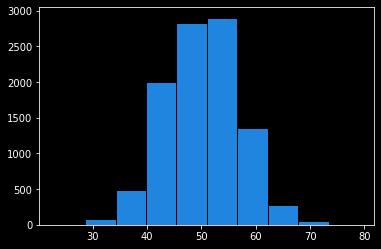

In [23]:
plt.hist(null_outcomes, color='#1F85DE', edgecolor='black', linewidth=1)
plt.show()

2. In the month we are investigating, we calculated that there were 41 purchases. Add a vertical line to your histogram at 41. Make this line red using `color = 'r'` so that you can see it.

    Where does 41 fall in this distribution? Is it relatively likely or unlikely?

*Hint: 41 purchases is somewhat likely to occur based on this null distribution. It is not in the middle of the distribution, where most density is, but it is also not way out in the tails (which would mean it is very unlikely).*

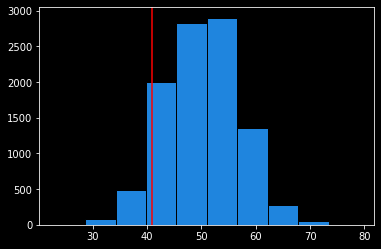

In [24]:
plt.hist(null_outcomes, color='#1F85DE', edgecolor='black', linewidth=1)
plt.axvline(41, color = 'r')
plt.show()

## Confidence Intervals

So far, we have inspected the null distribution and calculated the minimum and maximum values. While the number of purchases in each simulated sample ranged roughly from 25 to 75 by random chance, upon further inspection of the distribution, we saw that those extreme values happened very rarely.

By reporting an interval covering 95% of the values instead of the full range, we can say something like: "we are 95% confident that, if each visitor has a 10% chance of making a purchase, a random sample of 500 visitors will make between 37 and 63 purchases." We can use the `np.percentile()` function to calculate this 95% interval as follows:

```
np.percentile(outcomes, [2.5, 97.5])
# output: [37. 63.]
```

We calculated the 2.5th and 97.5th percentiles so that exactly 5% of the data falls outside those percentiles (2.5% above the 97.5th percentile, and 2.5% below the 2.5th percentile). This leaves us with a range covering 95% of the data.

If our observed statistic falls outside this interval, then we can conclude it is unlikely that the null hypothesis is true. In this example, because 41 falls within the 95% interval (37 - 63), it is still reasonably likely that we observed a lower purchase rate by random chance, even though the null hypothesis was true.

***
### Exercise

1. The code to generate null_outcomes has been provided for you. Calculate an interval covering the middle 90% of the values in `null_outcomes`. Save the output in a variable named `null_90CI` and print it out. Is the observed value of 41 purchases inside or outside this interval?

In [25]:
null_90CI = np.percentile(null_outcomes, [5, 95])
null_90CI

array([39., 61.])

## Calculating a One-Sided P-Value

*P-value* calculations and interpretations depend on the *alternative hypothesis* of a test, a description of the difference from expectation that we are interested in.

For example, let us return to the 10-coin-flip example from earlier. Suppose that we flipped a coin 10 times and observed only 2 heads. We might run a hypothesis test with the following null and alternative hypotheses:

* Null: the probability of heads is 0.5
* Alternative: the probability of heads is **less than** 0.5

This hypothesis test asks the question: *If* the probability of heads is 0.5, what is the probability of observing 2 or fewer heads among a single sample of 10 coin flips?

Earlier, we used a for-loop to repeatedly (10000 times!) flip a fair coin 10 times, and store the number of heads (for each set of 10 flips) in a list named `outcomes`. The probability of observing 2 or fewer heads among 10 coin flips is approximately equal to the proportion of those 10000 experiments where we observed 0, 1, or 2 heads:

```
import numpy as np
outcomes = np.array(outcomes)
p_value = np.sum(outcomes <= 2) / len(outcomes)
print(p_value) #output: 0.05
```

This calculation is equivalent to calculating the proportion of this histogram that is colored in red:

<img src="https://content.codecademy.com/courses/Hypothesis_Testing/one_sided_coin_flip.svg" alt="Null distribution with bars colored red for values less than or equal to 2" style="background-color:white;" width=500></img>

We estimated that the probability of observing 2 or fewer heads is about 0.059 (5.9%). This probability (0.059) is referred to as a *one-sided p-value*.

***
### Exercise

1. Use null_outcomes to estimate the p-value for a binomial hypothesis test with the following null and alternative hypotheses:

    * Null: the probability of a purchase was 10%
    * Alternative: the probability of a purchase rate was LESS THAN 10%

In other words, calculate the proportion of values in `null_outcomes` that are less than or equal to 41 (the observed number of purchases that we calculated earlier). Save this number as a variable named `p_value` and print it out.

Try pressing re-running a few times; You should see slightly different values of `p_value` each time. What do you think the true probability is?

*Hint: The p-value should be around 0.1*

In [26]:
observed_occurence = 41
null_outcomes = np.array(null_outcomes)
p_value = np.sum(null_outcomes <= 41)/len(null_outcomes)

p_value

0.1

## Calculating a Two-Sided P-Value

In the previous exercise, we calculated a one-sided p-value. In this exercise, we will estimate a p-value for a 2-sided test, which is the default setting for many functions in Python (and other languages, like R!).

In our 10-coin-flip experiment, remember that we observed 2 heads, which is 3 less than the expected value of 5 (50% of 10) if the null hypothesis is true. The two sided test focuses on the number of heads being three **different** from expectation, rather than just **less than**. The hypothesis test now asks the following question:

Suppose that the true probability of heads is 50%. What is the probability of observing **either** two or fewer heads OR eight or more heads? (Note that two and eight are both three away from five). The calculation now estimates the proportion of the null histogram that is colored in red:

<img src="https://content.codecademy.com/courses/Hypothesis_Testing/two_sided_coin_flip.svg" alt="Null distribution for 10 coin flips with a probability of heads equal to 0.5, and all bars above x-values <=2 or >=8 are shaded red, illustrating a two-sided hypothesis test" style="background-color:white;" width=500></img>

This proportion can be calculated in Python as follows. Note that the `|` symbol is similar to `'or'`, but works for comparing multiple values at once.

```
import numpy as np
outcomes = np.array(outcomes)
p_value = np.sum((outcomes <= 2) | (outcomes >= 8))/len(outcomes)
print(p_value) #output: 0.12
```

We end up with a p-value that is twice as large as the one-sided p-value.

***
### Exercise

1. Use `null_outcomes` to calculate the p-value for a two-sided test (alternative hypothesis is that the purchase probability was DIFFERENT FROM 10%). Remember that, if the purchase rate is 10%, we expect 50 of the 500 visitors to make a purchase.

    In other words, calculate the proportion of values in `null_outcomes` that are less than or equal to 41 (the number of purchases we observed in our sample, which is 9 fewer than 50) OR greater than or equal to 59 (which is 9 purchases more than 50). Save this number as a variable named p_value and print it out.

    Again, try pressing run a few times to observe a few different estimates of `p_value`. What do you think the true p-value is for this test?

In [27]:
observed_occurences = 41
expected_occurences = 50
upper_limit = (expected_occurences + (expected_occurences - observed_occurences))

p_value = np.sum((null_outcomes <= observed_occurences) | (null_outcomes >= upper_limit)) / len(null_outcomes) 

p_value

0.2067

***

## Writing a Binomial Test Function

So far, we have conducted a simulated binomial hypothesis test for Live-it-LIVE.com. In this exercise, we will use our code from the previous exercises to write our own binomial test function. Our function will use simulation, so it will estimate (albeit fairly accurately) the same p-values we would get using much more complex mathematical equations.

A function has been outlined for you in the cell below which contains the code that we used for Live_it_LIVE inside a function named `simulation_binomial_test()`. Your goal in the next few exercises will be to edit this function so that it takes in any values for the following:

* The observed sample statistic (eg., 41 purchases)
* The sample size (eg., 500 visitors)
* The null probability of success (eg., 0.10 probability of a purchase)

The function should return a p-value for a one-sided test where the alternative hypothesis is that the true probability of success is LESS THAN the null.

In [28]:
from scipy.stats import binom_test

def simulation_binomial_test():
  #initialize null_outcomes
  null_outcomes = []
  
  #generate the simulated null distribution
  for i in range(10000):
    simulated_monthly_visitors = np.random.choice(['y', 'n'], size=500, p=[.1, .9])
    num_purchased = np.sum(simulated_monthly_visitors == 'y')
    null_outcomes.append(num_purchased)

  #calculate a 1-sided p-value
  null_outcomes = np.array(null_outcomes)
  p_value = np.sum(null_outcomes <= 41)/len(null_outcomes) 
  
  #return the p-value
  return p_value

#Test your function below by uncommenting the code below. You should see that your simulation function gives you a very similar answer to the binom_test function from scipy:

#p_value1 = simulation_binomial_test(45, 500, .1)
#print("simulation p-value: ", p_value1)

#p_value2 = binom_test(45, 500, .1, alternative = 'less')
#print("binom_test p-value: ", p_value2)

***
### Exercise

1. The `simulation_binomial_test()` function has been outlined for you in the cell above. Add the following parameters to the function (in this order):

    * `observed_successes` (the observed sample statistic, eg., 41 purchases)
    * `n` (the sample size, eg., 500 visitors)
    * `p` (the null probability of success, eg., 0.10)

In [29]:
def simulation_binomial_test(observed_successes, n, p):
  null_outcomes = []
  
  #generate the simulated null distribution
  for i in range(10000):
    simulated_monthly_visitors = np.random.choice(['y', 'n'], size=500, p=[.1, .9])
    num_purchased = np.sum(simulated_monthly_visitors == 'y')
    null_outcomes.append(num_purchased)

  #calculate a 1-sided p-value
  null_outcomes = np.array(null_outcomes)
  p_value = np.sum(null_outcomes <= 41) / len(null_outcomes) 
  
  return p_value

2. Next, edit the `simulation_binomial_test()` function to remove all of the hard-coded values (eg., `500`, `0.1`, `0.9`, and `41`) so that the proper parameters are used in each calculation.

In [30]:
def simulation_binomial_test(observed_successes, n, p):
  null_outcomes = []
  
  #generate the simulated null distribution
  for i in range(10000):
    simulated_monthly_visitors = np.random.choice(['y', 'n'], size=n, p=[p, 1 - p])
    num_purchased = np.sum(simulated_monthly_visitors == 'y')
    null_outcomes.append(num_purchased)

  #calculate a 1-sided p-value
  null_outcomes = np.array(null_outcomes)
  p_value = np.sum(null_outcomes <= observed_successes) / len(null_outcomes) 
  
  return p_value

3. Uncomment the code at the bottom of example cell to test out your function and compare the results to the SciPy `binom_test()` function. Do you get similar answers?

In [31]:
p_value1 = simulation_binomial_test(45, 500, .1)
print("simulation p-value: ", p_value1)

p_value2 = binom_test(45, 500, .1, alternative = 'less')
print("binom_test p-value: ", p_value2)

simulation p-value:  0.252
binom_test p-value:  0.25468926056232155


***

## Binomial Testing with SciPy

Congratulations — if you have made it this far, you have now written your own function to simulate a binomial test!

More formally, the binomial distribution describes the number of expected "successes" in an experiment with some number of "trials". In the example you just worked through, the experiment consisted of 500 people visiting Live-it-LIVE.com. For each of those trials (visitors), we expected a 10% chance of a purchase (success), but observed only 41 successes (less than 10%).

SciPy has a function called `binom_test()`, which performs a binomial test for you. The default alternative hypothesis for the `binom_test()` function is two-sided, but this can be changed using the alternative parameter (eg., `alternative = 'less'` will run a one-sided lower tail test).

`binom_test()` requires three inputs, the number of observed successes, the number of total trials, and an expected probability of success. For example, with 10 flips of a fair coin (trials), the expected probability of heads is 0.5. Let us imagine we get 2 heads (observed successes) in 10 flips. Is the coin weighted? The function call for this binomial test would look like:

```
from scipy import binom_test
p_value = binom_test(2, n=10, p=0.5)
print(p_value) #output: 0.109
```

This tells us that *if* the true probability of heads is 0.5, the probability of observing 2 or fewer heads OR 8 or more heads is 0.109 (10.9%).

***
### Exercise

1. Use the `binom_test` function to run the same binomial test that you just simulated: A two-sided test for whether the observed 41 purchases among 500 visitors to Live-it-LIVE.com is far enough from the expected 10% purchase rate to convince you that the purchase rate was different from expectation this week.

    Save the p-value as `p_value_2sided` and print it out. Is this p-value similar to what you calculated via simulation (approximately 0.2)?

In [32]:
observed_occurences = 41
sample_size = 500
probability = 0.1
p_value_2sided = binom_test(x=observed_occurences, n=sample_size, p=probability, alternative='two-sided')
p_value_2sided

0.20456397700678308

2. Run the same hypothesis test as in step 1, but now as a one-sided test where the alternative hypothesis is that the probability of a visitor making a purchase was less than 10% (0.1).
    Save the p-value as `p_value_1sided` and print it out. Is this p-value similar to what you calculated via simulation (approximately 0.1)?


In [34]:
p_value_1sided = binom_test(x=observed_occurences, n=sample_size, p=probability, alternative='less')
p_value_1sided

0.1001135269756488

***

## Review

Congratulations! You now know how to run a binomial hypothesis test using a SciPy function — or by simulating it yourself! This will serve you well as a data scientist because it will enable you to investigate what is going on if pre-written functions return surprising results. You also now have a conceptual understanding of how a binomial test works and what questions it aims to answer. To summarize, here are some of the things you have learned about hypothesis tests in general:

* All hypothesis tests start with a null and alternative hypothesis
* Outcomes of a hypothesis test that might be reported include:
    * confidence intervals
    * p-values
* A hypothesis test can be simulated by:
    * taking repeated random samples where the null hypothesis is assumed to be true
    * using those simulated samples to generate a null distribution
    * comparing an observed sample statistic to that null distribution

***
### Exercise

1. As a final exercise, see if you can re-write the simulation-based binomial test function so that it has an input named `alternative_hypothesis` that can be equal to `'less'`, `'not_equal'`, or `'greater'`. Then change the function so that it performs the appropriate one- or two-sided test for the alternative hypothesis provided.

In [1]:
def simulation_binomial_test(observed_successes, n, p, alternative_hypothesis):
  null_outcomes = []
  
  #generate the simulated null distribution
  for i in range(10000):
    simulated_monthly_visitors = np.random.choice(['y', 'n'], size=n, p=[p, 1 - p])
    num_purchased = np.sum(simulated_monthly_visitors == 'y')
    null_outcomes.append(num_purchased)

  #calculate a 1-sided p-value
  null_outcomes = np.array(null_outcomes)
  if alternative_hypothesis == 'less':
    p_value = np.sum(null_outcomes <= observed_successes) / len(null_outcomes) 
  elif alternative_hypothesis == 'greater':
    p_value = np.sum(null_outcomes >= observed_successes) / len(null_outcomes) 
  else:
    difference = np.abs(p * n - observed_successes)
    upper_limit = p * n + difference
    lower_limit = p * n - difference
    p_value = np.sum((null_outcomes >= upper_limit) | (null_outcomes <= lower_limit)) / len(null_outcomes)
  #return the p-value
  return p_value